# Predicting the value of a house in King County, Washington

***

![House](king_county_skyline.jpg)

***

### Objectives
* Analyse what variables have the biggest impact in predicting price.  
* What are the tips we can provide for current homeowners that want to sell their home



# Approach (plan of action)

* Data mining
    * Import Libraries
    * Import Functions
    * Import the Data
        * Defining variables
* Clean the Data
    * Looking at NaN, missing values, extraneous values
    * Converting datatypes
    * Dummy variables
    * Distribution of data
        * Transformation (to deal with non-normality and linearity violations), standardization (scale?)
* Explore the Data
    * Use of visuals such as heatmaps, scatterplots, etc. to identify hypotheses we want to test in our model 
        * Heatmap
            * Refined heatmap
            * Based on correlations, consider use of control variables in our model (e.g., zipcode) to help capture noise in our model
* Feature Engineering
    * Select important features
* Predictive Modeling
    * Multiple Linear Regression
    * Train/Test
    * Evaluate performance
* Data Visualization
    * Display key findings to stakeholders
        * Layman terms for what a change in each variable does
        * Plots & data visualization


# Data Mining

## - Library Importing

In [22]:
import numpy as np #for linear algebra
import pandas as pd #Importing and manipulating DataFrames
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 

import matplotlib.pyplot as plt #For basic plotting
%matplotlib inline
import seaborn as sns #For more advanced/neater-looking plotting
import statsmodels.api as sm #For statistical tests and exploration

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.preprocessing import StandardScaler as scaler

import warnings
warnings.filterwarnings('ignore')

## - Functions Importing

In [23]:
#Plotting
def plot_hist(x_variable, df):
    print("Skewness: %f" % df[x_variable].skew())
    print("Kurtosis: %f" % df[x_variable].kurt())
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(df[x_variable], bins=20);

def plot_scatter(x_variable, df):
    sns.lmplot(x=x_variable, y="price", data=df);
    
def plot_bar(x_variable, df):
    print("Skewness: %f" % df[x_variable].skew())
    print("Kurtosis: %f" % df[x_variable].kurt())
    sns.barplot(x=x_variable, y='price', data=df);
    
def plot_count(x_variable, df):
    sns.countplot(x=x_variable, data=df)

## - Data Importing

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')

# Viewing the Data

In [25]:
df.shape

(21597, 21)

In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## - Defining our Variables
    * id = House's unique identification
    * date = Day that house was sold
    * price = Price at which house was sold
    * bedrooms = Number of bedrooms in the house
    * bathrooms = Number of bathrooms in the house
    * sqft_living = Size of the interior of the house (in square feet)
    * sqft_lot = Size of the lot (in square feet)
    * floors = Number of floors in the house
    * waterfront = Whether the house has a view to the waterfront or not
    * view = The number of views the house has had
    * condition = Overall condition of the house on a scale of 1-5 (worst to best, relative to age and grade)
    * grade = Construction quality on a scale of 1-13
    * sqft_above = Size of the house above ground (in square feet)
    * sqft_basement = Size of the house below ground (in square feet)
    * yr_built = Year the house was built
    * yr_renovated = Year the house was last renovated
    * zipcode = Zipcode
    * lat = Latitude coordinate
    * long = Longitude coordinate
    * sqft_living15 = Size of the nearest 15 neighbour's interior (in square feet)
    * sqft_lot15 = Size of the nearest 15 neighbour's lot size (in square feet)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [28]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [29]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Data Cleaning

## - Dealing with NaN values

In [31]:
df_cleaned = df.copy()

In [32]:
df_cleaned.isna().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

* We can see from this that the columns for **yr_renovated** and **waterfront** have a lot of na values.  **view** only has some.

####  Replacing NaN and Extraneous Values in 'sqft_basement':
* We also noticed that there were NaN values in **sqft_basement**.  These didn't show up in initially as the data in the column was formatted as an object.

In [33]:
df_cleaned['sqft_basement_calc'] = df_cleaned['sqft_living']-df_cleaned['sqft_above']
df_cleaned[['sqft_basement', 'sqft_basement_calc']]

,sqft_basement,sqft_basement_calc
0,0.0,0
1,400.0,400
2,0.0,0
3,910.0,910
4,0.0,0
5,1530.0,1530
6,?,0
7,0.0,0
8,730.0,730
9,0.0,0


* We added a new column to the Dataframe that calculated the size of the basement based on the difference in total living area, and total above ground living area.  This dealt with the '?' and NaN values.

## - Dealing with duplicate values

In [40]:
len(df_cleaned)-df_cleaned['id'].nunique()

177

In [44]:
df_cleaned[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc


In [43]:
df_cleaned = df_cleaned[df_cleaned['id'].duplicated(keep ='last')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,290
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,290
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,1600
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,1600
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,280
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,280


* Although there was 177 duplicated rows, almost every duplicated row saw a small difference in **date** and a significant jump in **price**.
* Due to the nature of the industry, this could be attributed to an initial undervaluing of the property, in the form of a foreclosure (missed mortgage payments).
* The theory that an investor rennovating a property over a short period of time does not hold up as every other variable remains the same (i.e. there is no indication of an increase in grade, or number of bathrooms) 
* We decided to keep the 2nd row, for each duplicated pair, as it more accurately reflects the house's price.

# Data Exploration

## Distribution of dependent variable (price)

Skewness: 4.023365
Kurtosis: 34.541359


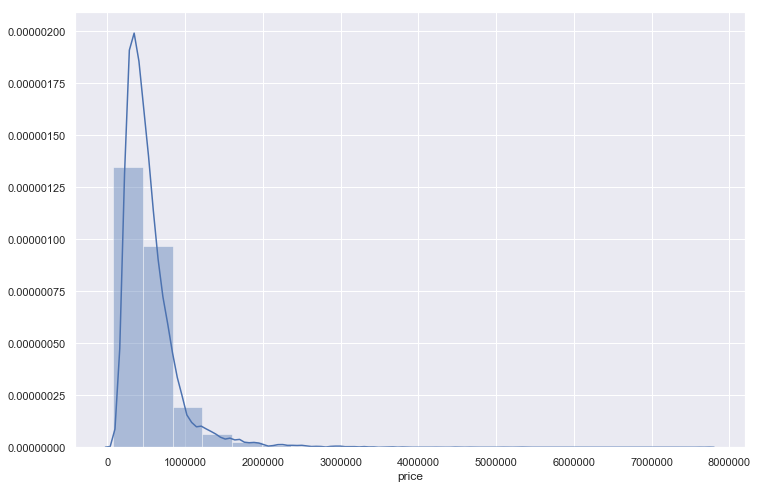

In [45]:
plot_hist('price', df_cleaned)

* We can clearly see a very long right tail.  This means that there are very few expensive houses in our dataframe.  

In [46]:
cut_off_price = 1000000
(len(df[df['price']>cut_off_price]))/(len(df['price']))*100

6.750937630226421

In [47]:
df_cleaned = df_cleaned[df_cleaned['price']<cut_off_price]

* We decided to drop the data for houses above the $1 Million mark as only 6.75% were above that mark

Skewness: 0.619274
Kurtosis: -0.331982


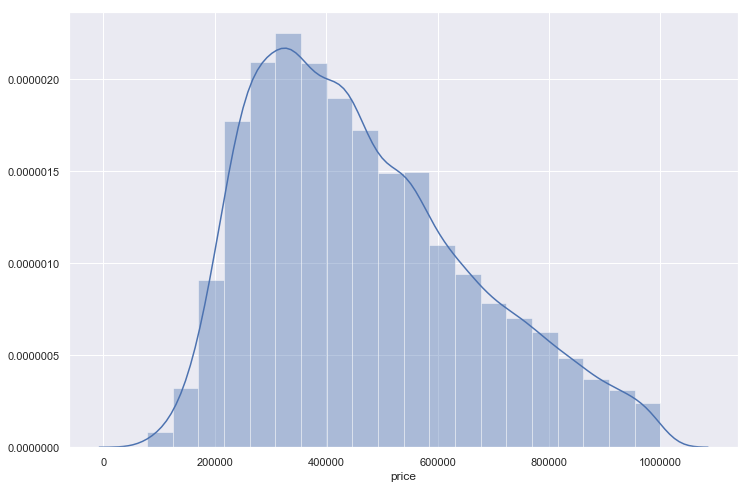

In [48]:
plot_hist('price', df_cleaned)

* Some observations made from drawing the histogram above and fitting the normal distribution to it:

    1) The price histogram data deviates from the normal distirbution only slightly, 

    2) Has moderate positive skewness.

    3) Demonstrates peakedness.

## Distribution of independent variables

## - Summary of Data Exploration

#### Distribution:

* Histogram of 'price' shows only a few outliers beyond $1 Million. 
    * Accounts for only 6.75% of dataset, 
    * Decision to drop these outliers from final dataset, used by our model
* 'Bedrooms' has an unlikely maximum of 33 units.  
* 'sqft_lot' has an unlikely maximum of 1.65 Million sqft
* 'yr_renovated' seems to have limited data


#### Wrongly Formatted:
* 'sqft_basement' needs to be in integer or float format
* 'date' needs to be in datetime format

#### NaN Values
* 'waterfront', 'view' and 'yr_renovated' have NaN values

#### Duplicate Entries
* The properties that were entered twice have been kept in
    * No rows are exactly the same, majority are 6 month turnaround with jump in price
    * Our best guess is the first entry was an undervaluation caused by foreclosure
    * Keeping both entries will average out each other

# Feature Engineering

# Predictive Modeling

# Data Visualization